In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

from astropy.table import Table
import astropy.units as u
import astropy.coordinates as coord
from astropy.io import ascii

from pyia import GaiaData
import gala.coordinates as gc

In [2]:
plt.style.use('notebook')

In [3]:
g = GaiaData('../data/gd1-with-masks.fits')
stream = g[g.pm_mask & g.gi_cmd_mask]

In [4]:
pmem = np.load('../data/pmem.npy')

In [5]:
tiso = Table.read('../data/gd1_iso.txt', format='ascii.commented_header', header_start=8)

In [6]:
dm = 5*np.log10(7600) - 5
dm = 5*np.log10(7800) - 5
print(dm)

14.4604730134524


(0, 1)

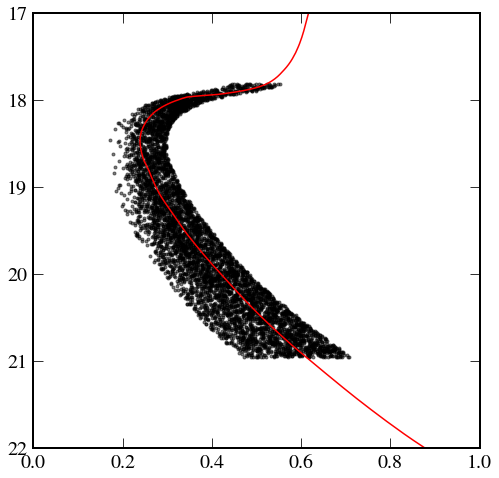

In [7]:
plt.plot(stream.g0-stream.i0, stream.g0, 'k.', alpha=0.5)
plt.plot(tiso['gp1']-tiso['ip1'], tiso['gp1']+dm, 'r-')

plt.ylim(22,17)
plt.xlim(0,1)

In [8]:
tlf = Table.read('../data/gd1_lf.txt', format='ascii.commented_header', header_start=8)
tlf['gp1'] += dm

In [9]:
tlf

N,gp1,Log10(N),Log10(dN)
int64,float64,float64,float64
1,12.613473013452401,-0.7429,-0.7429
2,12.7134730134524,-0.4218,-0.7037
3,12.8134730134524,-0.2378,-0.6997
4,12.9134730134524,-0.1015,-0.6711
5,13.013473013452401,0.0099,-0.6354
6,13.113473013452401,0.1039,-0.6069
7,13.2134730134524,0.1828,-0.597
8,13.3134730134524,0.2549,-0.5605
9,13.4134730134524,0.3203,-0.5343


In [10]:
for i in range(1, 156):
    print(i, 10**tlf['Log10(N)'][i] - 10**tlf['Log10(N)'][i-1], 10**tlf['Log10(dN)'][i], 
          10**tlf['Log10(N)'][i] - 10**tlf['Log10(N)'][i-1] - 10**tlf['Log10(dN)'][i],
         (10**tlf['Log10(N)'][i] - 10**tlf['Log10(N)'][i-1] - 10**tlf['Log10(dN)'][i]) / 10**tlf['Log10(N)'][i])

1 0.19785787498914234 0.1978335754143396 2.4299574802738588e-05 6.417984653982856e-05
2 0.19974542768011166 0.19966410694979164 8.132073032002252e-05 0.00014060516366834832
3 0.21322712284079026 0.21325538179462006 -2.8258953829796152e-05 -3.5699002386546e-05
4 0.2314679428624078 0.2315261233243763 -5.818046196851001e-05 -5.6869206079190815e-05
5 0.24722418090214004 0.24722933460623384 -5.153704093791012e-06 -4.057135190709316e-06
6 0.25306948476075974 0.2529297996446145 0.00013968511614526058 9.169594555338931e-05
7 0.2751056943273711 0.2751059604990365 -2.6617166543063675e-07 -1.4800003632227986e-07
8 0.2922831066052083 0.292213314244037 6.979236117127252e-05 3.33816570728238e-05
9 0.30312703709204314 0.3030400297788365 8.700731320665511e-05 3.634592765536715e-05
10 0.32758084528017495 0.32749147555557895 8.936972459600012e-05 3.28390374984915e-05
11 0.3581925950480258 0.35875668303926167 -0.0005640879912358621 -0.0001831668405021197
12 0.37895697360409386 0.3784425847170933 0.000514

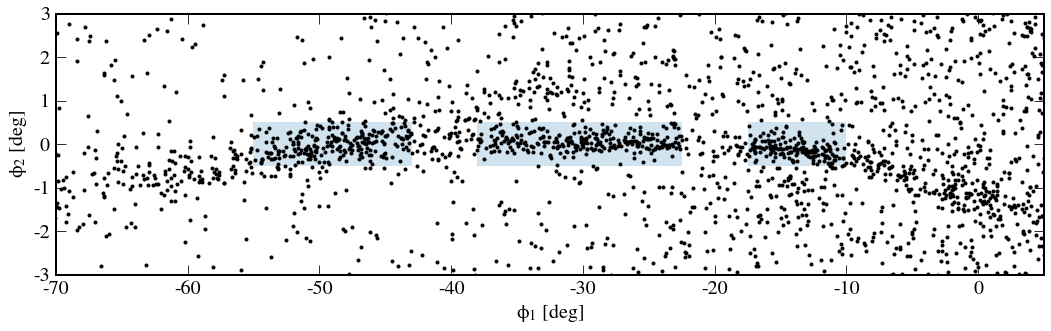

In [11]:
plt.figure(figsize=(15,5))
plt.plot(stream.phi1, stream.phi2, 'k.')

# plt.axhline(-0.2)
# plt.axhline(0.2)
# plt.axvline(-23)
# plt.axvline(-33)

# plt.axhline(1)
# plt.axhline(1.4)
# plt.axvline(-30.5)
# plt.axvline(-35.5)

# plt.axhline(0.5)
# plt.axhline(-0.5)
# plt.axvline(-10)
# plt.axvline(-55)

# plt.axvline(-43)
# plt.axvline(-38)
# plt.axvline(-17.5)
# plt.axvline(-22.5)

r = mpl.patches.Rectangle((-55,-0.5), 12, 1, ec='none', fc='tab:blue', alpha=0.2)
plt.gca().add_patch(r)

r = mpl.patches.Rectangle((-38,-0.5), 15.5, 1, ec='none', fc='tab:blue', alpha=0.2)
plt.gca().add_patch(r)

r = mpl.patches.Rectangle((-17.5,-0.5), 7.5, 1, ec='none', fc='tab:blue', alpha=0.2)
plt.gca().add_patch(r)

plt.ylim(-3,3)
plt.xlim(-70,5)
# plt.gca().set_aspect('equal')

plt.xlabel('$\phi_1$ [deg]')
plt.ylabel('$\phi_2$ [deg]')
plt.tight_layout()
plt.savefig('../plots/density_estimate_areas.png')

In [12]:
spatial_mask = ((stream.phi1<-23*u.deg) & (stream.phi1>-33*u.deg) & 
                (stream.phi2>-0.2*u.deg) & (stream.phi2<0.2*u.deg))
area = 10*0.4*u.deg**2

In [13]:
h, be = np.histogram(stream.g0[spatial_mask], bins=20)
bcen = 0.5*(be[1:]+be[:-1])
hcum = np.cumsum(h)

In [14]:
spur_mask = ((stream.phi1<-30.5*u.deg) & (stream.phi1>-35.5*u.deg) & 
                (stream.phi2>1*u.deg) & (stream.phi2<1.4*u.deg))
area_spur = 5*0.4*u.deg**2

In [15]:
h_spur, be_spur = np.histogram(stream.g0[spur_mask], bins=20)
bcen_spur = 0.5*(be_spur[1:]+be_spur[:-1])
hcum_spur = np.cumsum(h_spur)

In [16]:
all_mask = ((stream.phi1<-10*u.deg) & (stream.phi1>-55*u.deg) & 
            ((stream.phi1<-43*u.deg) | 
             ((stream.phi1>-38*u.deg) & (stream.phi1<-22.5*u.deg)) | 
             (stream.phi1>-17.5*u.deg)) &
                (stream.phi2>-0.5*u.deg) & (stream.phi2<0.5*u.deg))
area_all = 35*1*u.deg**2

In [17]:
h_all, be_all = np.histogram(stream.g0, bins=20)
bcen_all = 0.5*(be_all[1:]+be_all[:-1])
hcum_all = np.cumsum(h_all)
complete_mask = bcen_all < 20

In [61]:
area_acs = (202*u.arcsec)**2
area_uvis = (162*u.arcsec)**2
area_parallel = area_acs + area_uvis

In [62]:
area_parallel/area_acs

<Quantity 1.64317224>

In [19]:
(area_acs/area).decompose(), (area_acs/area_spur).decompose()

(<Quantity 0.00078711>, <Quantity 0.00157423>)

In [20]:
print((np.sum(spatial_mask)/area*area_acs).decompose(),
(np.sum(spur_mask)/area_spur*area_acs).decompose())

0.11334444444444444 0.03935570987654321


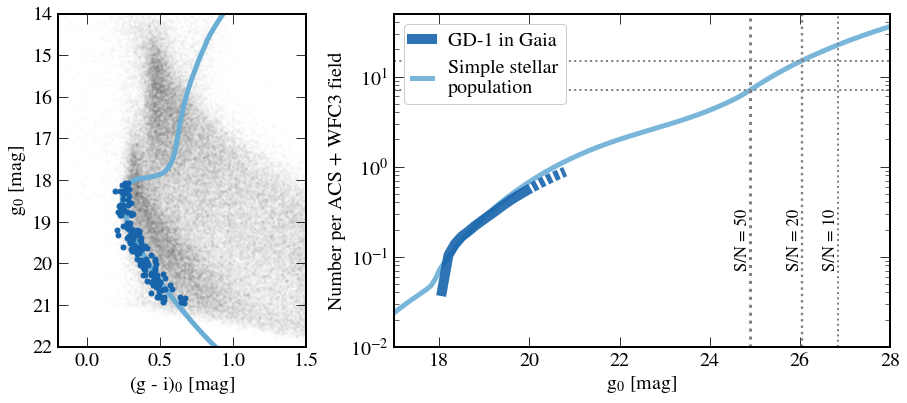

In [76]:
f = 1
f0 = 30
f_stream = 0.055
f_spur = 0.011
f_all = 0.15
# f_stream = 0.07
# f_spur = 0.015

lw_lf = 5
lw_gd1 = 10
c_lf = '0.3'
c_gd1 = 'k'
c_lf = mpl.cm.Blues(0.5)
c_gd1 = mpl.cm.Blues(0.8)
alpha = 0.9

c_guide = '0.5'
ls_guide = ':'
lw_guide = 2

snr = np.array([50,20,10])
mag = np.array([24.89,26.04,26.85])
lw_scale = [1.5,1.2,1]

fig, ax = plt.subplots(1,2,figsize=(13,6), gridspec_kw={'width_ratios':[1,2]})

plt.sca(ax[0])
plt.plot(g.g0[g.pm_mask]-g.i0[g.pm_mask], g.g0[g.pm_mask], 'k.', mec='none', alpha=0.01, rasterized=True, zorder=0)
plt.plot(stream.g0[spatial_mask]-stream.i0[spatial_mask], stream.g0[spatial_mask], 'o', ms=5, color=c_gd1, zorder=2)
plt.plot(tiso['gp1']-tiso['ip1'], tiso['gp1']+dm, '-', color=c_lf, lw=lw_lf, zorder=1)

plt.ylim(22,14)
plt.xlim(-0.2,1.5)

plt.xlabel('(g - i)$_0$ [mag]')
plt.ylabel('g$_0$ [mag]')

plt.sca(ax[1])
# plt.plot(tlf['gp1'], (f_stream*10**tlf['Log10(N)']/area*area_acs).decompose(),
#          color=c_lf, lw=lw_lf, alpha=alpha, label='Luminosity\nfunction')
# plt.plot(bcen,(hcum/area*area_acs).decompose(),
#          color=c_gd1, lw=lw_gd1, alpha=alpha, label='GD-1')

# plt.plot(tlf['gp1'], (f_spur*10**tlf['Log10(N)']/area_spur*area_acs).decompose(),
#          color=c_lf, lw=lw_lf, alpha=alpha, label='')
# plt.plot(bcen_spur,(hcum_spur/area_spur*area_acs).decompose(),
#          color=c_gd1, lw=lw_gd1, alpha=alpha, label='')

plt.plot(bcen_spur[complete_mask],(hcum_all[complete_mask]/area_all*area_parallel).decompose(),
         color=c_gd1, lw=lw_gd1, alpha=alpha, label='GD-1 in Gaia', zorder=1)
plt.plot(bcen_spur[~complete_mask],(hcum_all[~complete_mask]/area_all*area_parallel).decompose(),
         color=c_gd1, lw=lw_gd1, alpha=alpha, ls='--', dashes=(0.5, 0.3), label='', zorder=1)
plt.plot(tlf['gp1'], (f_all*10**tlf['Log10(N)']/area_spur*area_parallel).decompose(),
         color=c_lf, lw=lw_lf, alpha=alpha, label='Simple stellar\npopulation', zorder=0)

plt.axhline(15, lw=lw_guide, color=c_guide, ls=ls_guide)
plt.axhline(7, lw=lw_guide, color=c_guide, ls=ls_guide)
# plt.axhline(10, lw=lw_guide, color=c_guide, ls=ls_guide)
# plt.axhline(15, lw=0.5)

for e in range(3):
    plt.axvline(mag[e], lw=lw_scale[e]*lw_guide, color=c_guide, ls=ls_guide)
    plt.text(mag[e]-0.15, 0.07, 'S/N = {:g}'.format(snr[e]), rotation=90, va='bottom', ha='center', fontsize='small')
# plt.axvline(25, lw=1.5*lw_guide, color=c_guide, ls=ls_guide)
# plt.axvline(26, lw=1.2*lw_guide, color=c_guide, ls=ls_guide)
# plt.axvline(27, lw=lw_guide, color=c_guide, ls=ls_guide)

# plt.text(21.8, 0.8, 'Stream', rotation=15, va='bottom', ha='left')
# plt.text(22.2, 0.15, 'Spur', rotation=15, va='bottom', ha='left')
plt.legend(frameon=True, framealpha=1, fontsize='medium', handlelength=1, loc=2)

plt.gca().set_yscale('log')
plt.ylim(0.01, 50)
plt.xlim(17, 28)

plt.xlabel('g$_0$ [mag]')
plt.ylabel('Number per ACS + WFC3 field')

plt.tight_layout()
plt.savefig('../plots/target_density.png')
plt.savefig('../plots/target_density.pdf', dpi=150)

In [71]:
pmerr_3yr = ((0.05*u.arcsec * 2 / (np.sqrt(3*4)*snr)) / (3*u.yr)).to(u.mas/u.yr)
pmerr_10yr = ((0.05*u.arcsec * 2 / (np.sqrt(3*4)*snr)) / (10*u.yr)).to(u.mas/u.yr)

In [72]:
pmerr_3yr

<Quantity [0.19245009, 0.48112522, 0.96225045] mas / yr>

In [73]:
pmerr_3yr / np.sqrt(15*2)

<Quantity [0.03513642, 0.08784105, 0.17568209] mas / yr>

In [74]:
pmerr_3yr / np.sqrt(5*4)

<Quantity [0.04303315, 0.10758287, 0.21516574] mas / yr>

In [83]:
pmerr_stream = np.sqrt(pmerr_3yr[0]**2*7*2 + pmerr_3yr[1]**2*8*2)/30
pmerr_spur = np.sqrt(pmerr_3yr[0]**2*9 + pmerr_3yr[1]**2*11)/20

In [84]:
for pmerr in [pmerr_stream, pmerr_spur]:
    print('{:.3g} {:.3g}'.format(pmerr.to(u.mas/u.yr), (pmerr*4.74*u.km/u.s*u.yr/u.mas/u.kpc*8*u.kpc)))

0.0685 mas / yr 2.6 km / s
0.0848 mas / yr 3.22 km / s


In [28]:
# number of orbits per field * (2*stream fields + spur fields)
7*(2*2+4)

56

## Field selection

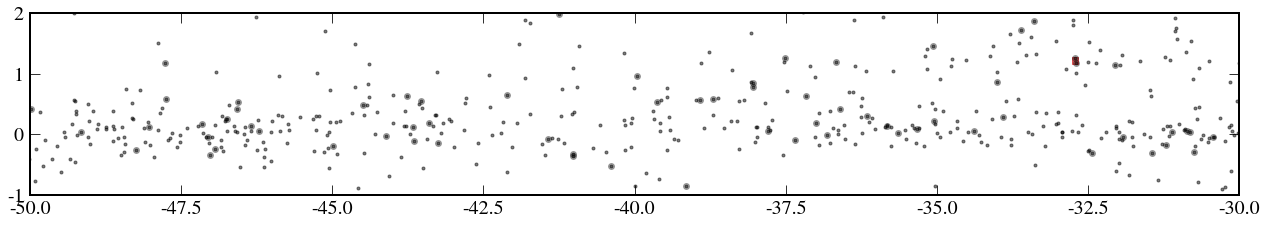

In [29]:
faint_mask = stream.g0>20.5*u.mag

plt.figure(figsize=(18,6))
plt.plot(stream.phi1, stream.phi2, 'k.', alpha=0.5)
plt.plot(stream.phi1[faint_mask], stream.phi2[faint_mask], 'ko', alpha=0.3)

w = (202*u.arcsec).to(u.deg).value

r = mpl.patches.Rectangle((-32.77,1.167),2*w,2*w, fc='tab:red', ec='tab:red', alpha=0.7, zorder=1)
plt.gca().add_patch(r)

plt.xlim(-35,-30)
plt.ylim(0.5,1.5)

plt.xlim(-50,-30)
plt.ylim(-1,2)

plt.gca().set_aspect('equal')
plt.tight_layout()

## Empirical scaling of target density

In [30]:
def lf_gain(d, mag0, mag1, mag2, dm=dm, tlf=tlf):
    N=10**tlf['Log10(N)']
    dm_ = 5*np.log10(d.to(u.pc).value) - 5
    delta_dm = dm_ - dm
    
    i_g1 = np.argmin(np.abs(tlf['gp1'] + delta_dm - mag2))
    i_g2 = np.argmin(np.abs(tlf['gp1'] + delta_dm - mag1))
    Nlf_deep = N[i_g1] - N[i_g2]

    i_g3 = np.argmin(np.abs(tlf['gp1'] + delta_dm - mag0))
    Nlf_shallow = N[i_g3]
    
    return Nlf_deep/Nlf_shallow

In [31]:
# depth gains at different distances
distances = np.array([7.8,13,20,30])*u.kpc

for e, d in enumerate(distances):
    print(d, lf_gain(d,22.5,21,27))

7.8 kpc 9.523289344442999
13.0 kpc 8.469585772413671
20.0 kpc 7.617001347051026
30.0 kpc 8.787052154832693


In [32]:
g_lethe = lf_gain(13*u.kpc,22.5,21,27)
g_orphan = lf_gain(20*u.kpc,22.5,21,26.6)
g_gd1 = lf_gain(7.8*u.kpc,20.5,21,26)

In [33]:
rho_lethe = 12*u.deg**-2
rho_orphan = 40*u.deg**-2
rho_stream = np.sum(spatial_mask)/area
rho_spur = np.sum(spur_mask)/area_spur

In [34]:
Nacs_lethe = 3
Nacs_orphan = 5

In [35]:
n_lethe = (rho_lethe * g_lethe * area_acs).decompose()
n_orphan = (rho_orphan * g_orphan * area_acs).decompose()
n_stream = (rho_stream * g_gd1 * area_acs).decompose()
n_spur = (rho_spur * g_gd1 * area_acs).decompose()

In [36]:
femp_lethe = Nacs_lethe / n_lethe
femp_orphan = Nacs_orphan / n_orphan
femp = 0.5*(femp_lethe + femp_orphan)
print(femp_lethe, femp_orphan, femp)

9.375190491675246 6.860432137030715 8.11781131435298


In [37]:
Nacs_stream = n_stream * femp
Nacs_spur = n_spur * femp
print(Nacs_stream, Nacs_spur)

12.824766582420073 4.4530439522291925


In [38]:
Nacs_stream, Nacs_spur

(<Quantity 12.82476658>, <Quantity 4.45304395>)

In [39]:
pmerr_3yr[1]/np.sqrt(Nacs_stream*3), pmerr_3yr[1]/np.sqrt(Nacs_spur*3)

(<Quantity 0.07756624 mas / yr>, <Quantity 0.13163428 mas / yr>)

In [40]:
all_spatial_mask = ((g.phi1<-23*u.deg) & (g.phi1>-33*u.deg) & 
                (g.phi2>-0.2*u.deg) & (g.phi2<0.2*u.deg))
all_back_mask = ((g.phi1<-23*u.deg) & (g.phi1>-33*u.deg) & 
                (g.phi2>-1.2*u.deg) & (g.phi2<-0.8*u.deg))
all_area = 10*0.4*u.deg**2

In [41]:
np.sum(spatial_mask), np.sum(all_spatial_mask & g.gi_cmd_mask)-np.sum(all_back_mask & g.gi_cmd_mask)

(144, 149)

## Gaia proper motions in stream / spur

In [42]:
onstream_mask = ((stream.phi1<-30.5*u.deg) & (stream.phi1>-35.5*u.deg) & 
                 (stream.phi2>-0.2*u.deg) & (stream.phi2<0.2*u.deg))
spur_mask = ((stream.phi1<-30.5*u.deg) & (stream.phi1>-35.5*u.deg) & 
             (stream.phi2>1*u.deg) & (stream.phi2<1.4*u.deg))

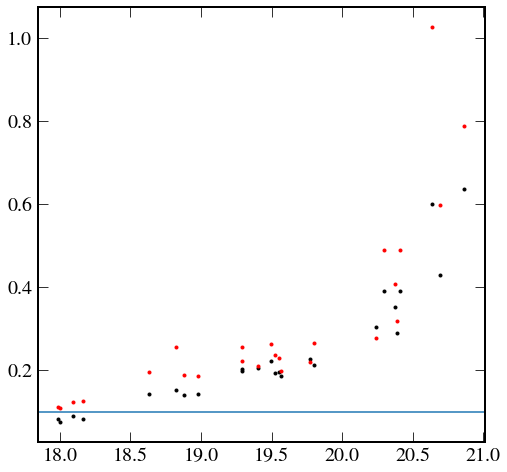

In [43]:
plt.plot(stream.g0[spur_mask], 2/5*stream.pmra_error[spur_mask], 'k.')
plt.plot(stream.g0[spur_mask], 2/5*stream.pmdec_error[spur_mask], 'r.')
plt.axhline(0.1)

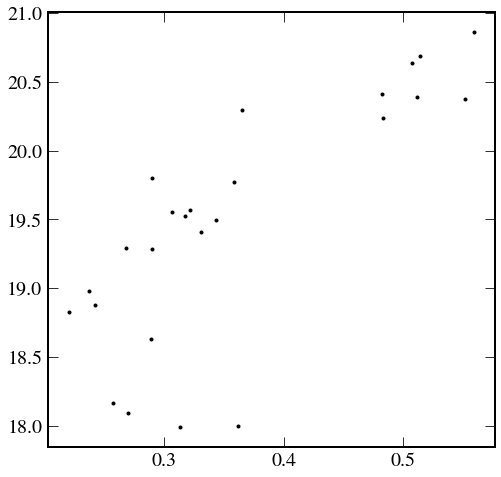

In [44]:
plt.plot(stream.g0[spur_mask]-stream.i0[spur_mask], stream.g0[spur_mask], 'k.')

In [45]:
c = coord.SkyCoord('10 23 32.25 +42 30 01.81', unit=(u.hourangle, u.deg))
c2 = coord.SkyCoord('10 14 15.240 +40 41 13.50', unit=(u.hourangle, u.deg))
c3 = coord.SkyCoord('10 17 34.455 +40 59 36.89', unit=(u.hourangle, u.deg))
c4 = coord.SkyCoord('10 18 29.677 +41 24 04.90', unit=(u.hourangle, u.deg))
c5 = coord.SkyCoord('10 04 34.453 +41 12 44.49', unit=(u.hourangle, u.deg))
c6 = coord.SkyCoord('10 29 07.560 +42 17 37.64', unit=(u.hourangle, u.deg))

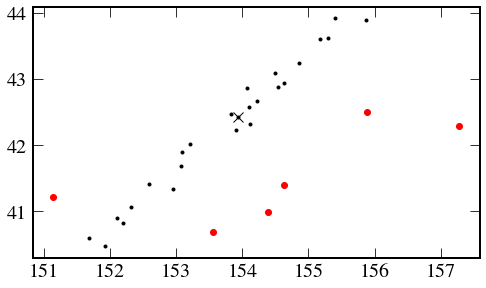

In [46]:
plt.plot(c.ra.deg, c.dec.deg, 'ro')
plt.plot(c2.ra.deg, c2.dec.deg, 'ro')
plt.plot(c3.ra.deg, c3.dec.deg, 'ro')
plt.plot(c4.ra.deg, c4.dec.deg, 'ro')
plt.plot(c5.ra.deg, c5.dec.deg, 'ro')
plt.plot(c6.ra.deg, c6.dec.deg, 'ro')

plt.plot(stream.ra[spur_mask], stream.dec[spur_mask], 'k.')

plt.plot(np.median(stream.ra[spur_mask]), np.median(stream.dec[spur_mask]), 'kx', ms=10)

plt.gca().set_aspect('equal')

In [47]:
np.average(stream.pmra[spur_mask].value, weights=(stream.pmra_error[spur_mask])**-2)

<Quantity -6.20153563>

In [48]:
np.average(stream.pmra[onstream_mask].value, weights=(stream.pmra_error[onstream_mask])**-2)

<Quantity -6.26708757>

In [49]:
np.average(stream.pmdec[spur_mask].value, weights=(stream.pmdec_error[spur_mask])**-2)

<Quantity -11.94176538>

In [50]:
np.average(stream.pmdec[onstream_mask].value, weights=(stream.pmdec_error[onstream_mask])**-2)

<Quantity -11.72523729>

In [51]:
np.std(stream.pmdec[onstream_mask].value)

1.027652512117477

In [52]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    return (average, np.sqrt(variance))

In [53]:
weighted_avg_and_std(stream.pmdec[onstream_mask], (stream.pmdec_error[onstream_mask])**-2)

(<Quantity -11.72523729 marcsec / yr>, <Quantity 0.89783534 marcsec / yr>)

In [54]:
weighted_avg_and_std(stream.pmdec[spur_mask], (stream.pmdec_error[spur_mask])**-2)

(<Quantity -11.94176538 marcsec / yr>, <Quantity 0.64539911 marcsec / yr>)

In [55]:
weighted_avg_and_std(stream.pmra[onstream_mask], (stream.pmra_error[onstream_mask])**-2)

(<Quantity -6.26708757 marcsec / yr>, <Quantity 0.52412486 marcsec / yr>)

In [56]:
weighted_avg_and_std(stream.pmra[spur_mask], (stream.pmra_error[spur_mask])**-2)

(<Quantity -6.20153563 marcsec / yr>, <Quantity 0.48703257 marcsec / yr>)

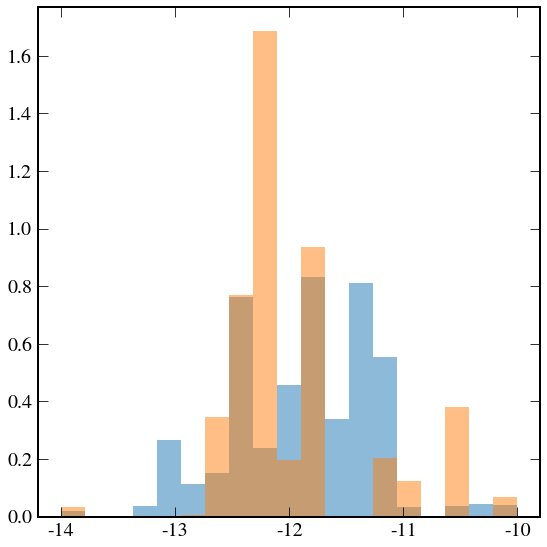

In [57]:
bins = np.linspace(-14,-10,20)
plt.hist(stream.pmdec[onstream_mask].value, bins=bins, weights=(stream.pmdec_error[onstream_mask].value)**-2,
         alpha=0.5, density=True)
plt.hist(stream.pmdec[spur_mask].value, bins=bins, weights=(stream.pmdec_error[spur_mask].value)**-2,
         alpha=0.5, density=True)

plt.tight_layout()

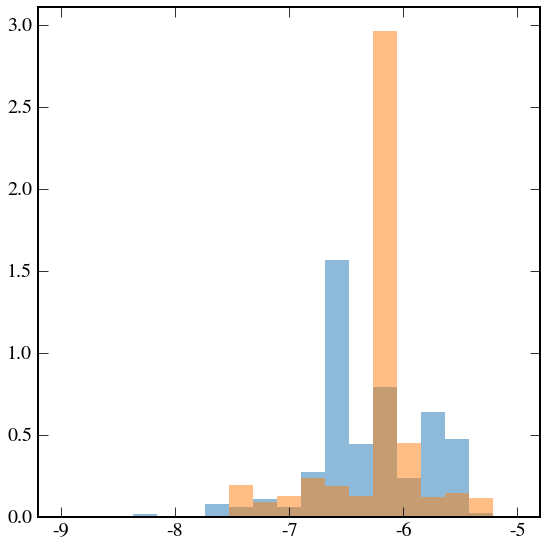

In [58]:
bins = np.linspace(-9,-5,20)
plt.hist(stream.pmra[onstream_mask].value, bins=bins, weights=(stream.pmra_error[onstream_mask].value)**-2, alpha=0.5,
        density=True)
plt.hist(stream.pmra[spur_mask].value, bins=bins, weights=(stream.pmra_error[spur_mask].value)**-2, alpha=0.5,
        density=True)

plt.tight_layout()

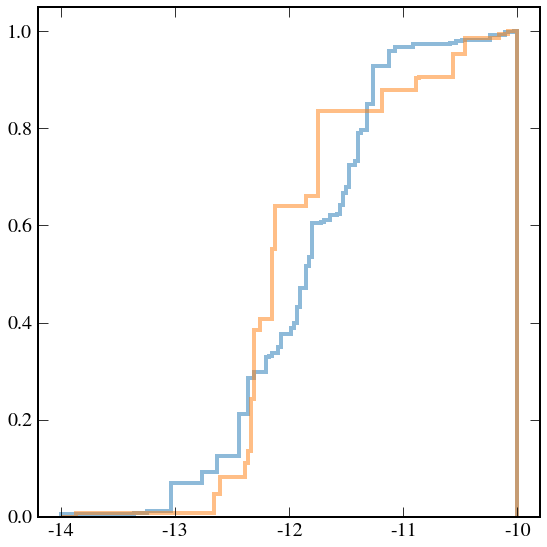

In [59]:
bins = np.linspace(-14,-10,150)
plt.hist(stream.pmdec[onstream_mask].value, bins=bins, weights=(stream.pmdec_error[onstream_mask].value)**-2,
         alpha=0.5, density=True, cumulative=True, histtype='step', lw=4)
plt.hist(stream.pmdec[spur_mask].value, bins=bins, weights=(stream.pmdec_error[spur_mask].value)**-2,
         alpha=0.5, density=True, cumulative=True, histtype='step', lw=4)

plt.tight_layout()

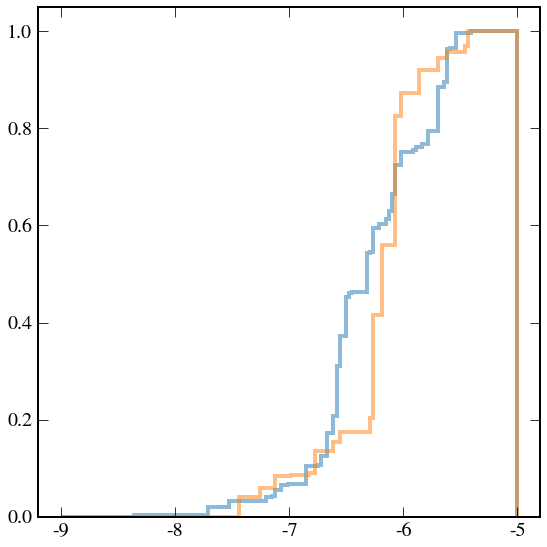

In [60]:
bins = np.linspace(-9,-5,150)
plt.hist(stream.pmra[onstream_mask].value, bins=bins, weights=(stream.pmra_error[onstream_mask].value)**-2,
         alpha=0.5, density=True, cumulative=True, histtype='step', lw=4)
plt.hist(stream.pmra[spur_mask].value, bins=bins, weights=(stream.pmra_error[spur_mask].value)**-2,
         alpha=0.5, density=True, cumulative=True, histtype='step', lw=4)

plt.tight_layout()